# Q3
Feed the following paragraph into your favourite data analytics tool, and answer the following:
- a. What is the probability of the word “data” occurring in each line ?  
- b. What is the distribution of distinct word counts across all the lines ?  
- c. What is the probability of the word “analytics” occurring after the word “data” ?

## a. What is the probability of the word “data” occurring in each line ? 

In [1]:
# Import necessary libraries
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk

In [2]:
# Create variable paragraph to store the text
paragraph = """As a term, data analytics predominantly refers to an assortment of applications, from basic business
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate
category. Data analytics initiatives can help businesses increase revenues, improve operational
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of
boosting business performance. Depending on the particular application, the data that's analyzed
can consist of either historical records or new information that has been processed for real-time
analytics uses. In addition, it can come from a mix of internal systems and external data sources. At
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical
techniques to determine whether hypotheses about a data set are true or false. EDA is often
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a
distinction first drawn by statistician John W Tukey in his 1977 book Exploratory Data Analysis. Data
analytics can also be separated into quantitative data analysis and qualitative data analysis. The
former involves analysis of numerical data with quantifiable variables that can be compared or
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding
the content of non-numerical data like text, images, audio and video, including common phrases,
themes and points of view."""
print(paragraph)

As a term, data analytics predominantly refers to an assortment of applications, from basic business
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate
category. Data analytics initiatives can help businesses increase revenues, improve operational
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of
boosting business performance. Depending on the particular application, the data that's analyzed
can consist of 

In [3]:
# Convert paragraph to lines
def paragraph_to_lines(text):
    text = text.lower()  # To lowercase
    text = re.sub("'s", " is", text)  # Expand contraction
    text = re.sub("n't", " not", text)  # Expand contraction
    lines = text.split(".")  # Split paragraph into lines
    lines = [re.sub("[^\w\s\d]+", " ", line) for line in lines]  # Keep only words, digits, and spaces
    lines = [re.sub("\s+", " ", line).strip() for line in lines]  # Remove extra spaces
    lines = [line.split(" ") for line in lines]  # Tokenize each line
    return lines[:-1]

lines = paragraph_to_lines(paragraph)
print(lines[0])  # Inspect first line

['as', 'a', 'term', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', 'from', 'basic', 'business', 'intelligence', 'bi', 'reporting', 'and', 'online', 'analytical', 'processing', 'olap', 'to', 'various', 'forms', 'of', 'advanced', 'analytics']


In [4]:
# Count probability of the word “data” occurring in each line
for i in range(len(lines)):
    prob = Counter(lines[i])["data"] / len(lines[i]) * 100
    print(f"Line {i+1}: {prob:.2f}%")

Line 1: 3.45%
Line 2: 5.41%
Line 3: 3.57%
Line 4: 2.44%
Line 5: 3.57%
Line 6: 6.67%
Line 7: 11.90%
Line 8: 2.56%
Line 9: 21.43%
Line 10: 5.88%
Line 11: 3.33%


## b. What is the distribution of distinct word counts across all the lines ? 

In [5]:
# Get distinct word counts across all lines
distinct_word_counts = [len(set(line)) for line in lines]
print(distinct_word_counts)

[26, 28, 26, 40, 26, 15, 33, 34, 11, 17, 27]


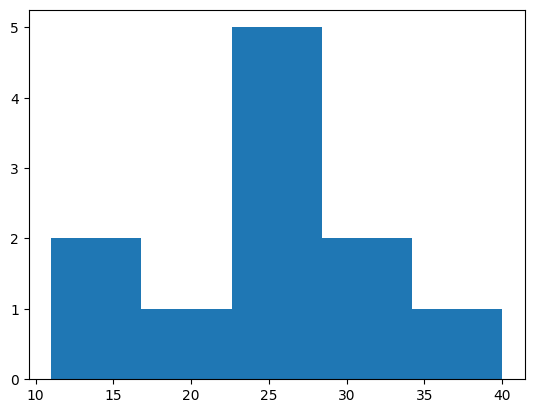

In [6]:
# Visualize the distribution of distinct word counts across all the lines using histogram
plt.hist(distinct_word_counts, bins=5)
plt.show()

### Findings:
The distribution of distinct word counts across all 11 lines are roughly normal distribution

## c. What is the probability of the word “analytics” occurring after the word “data” ?
P(analytics|data) = Count(data analytics) / Count(data)

In [7]:
# Combine all lines together
combined = []
for line in lines:
    combined.extend(line)
print(combined)

['as', 'a', 'term', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', 'from', 'basic', 'business', 'intelligence', 'bi', 'reporting', 'and', 'online', 'analytical', 'processing', 'olap', 'to', 'various', 'forms', 'of', 'advanced', 'analytics', 'in', 'that', 'sense', 'it', 'is', 'similar', 'in', 'nature', 'to', 'business', 'analytics', 'another', 'umbrella', 'term', 'for', 'approaches', 'to', 'analyzing', 'data', 'with', 'the', 'difference', 'that', 'the', 'latter', 'is', 'oriented', 'to', 'business', 'uses', 'while', 'data', 'analytics', 'has', 'a', 'broader', 'focus', 'the', 'expansive', 'view', 'of', 'the', 'term', 'is', 'not', 'universal', 'though', 'in', 'some', 'cases', 'people', 'use', 'data', 'analytics', 'specifically', 'to', 'mean', 'advanced', 'analytics', 'treating', 'bi', 'as', 'a', 'separate', 'category', 'data', 'analytics', 'initiatives', 'can', 'help', 'businesses', 'increase', 'revenues', 'improve', 'operational', 'efficien

In [8]:
# Get all bigrams of the combined lines
bigrams = list(nltk.bigrams(combined))
print(bigrams)

[('as', 'a'), ('a', 'term'), ('term', 'data'), ('data', 'analytics'), ('analytics', 'predominantly'), ('predominantly', 'refers'), ('refers', 'to'), ('to', 'an'), ('an', 'assortment'), ('assortment', 'of'), ('of', 'applications'), ('applications', 'from'), ('from', 'basic'), ('basic', 'business'), ('business', 'intelligence'), ('intelligence', 'bi'), ('bi', 'reporting'), ('reporting', 'and'), ('and', 'online'), ('online', 'analytical'), ('analytical', 'processing'), ('processing', 'olap'), ('olap', 'to'), ('to', 'various'), ('various', 'forms'), ('forms', 'of'), ('of', 'advanced'), ('advanced', 'analytics'), ('analytics', 'in'), ('in', 'that'), ('that', 'sense'), ('sense', 'it'), ('it', 'is'), ('is', 'similar'), ('similar', 'in'), ('in', 'nature'), ('nature', 'to'), ('to', 'business'), ('business', 'analytics'), ('analytics', 'another'), ('another', 'umbrella'), ('umbrella', 'term'), ('term', 'for'), ('for', 'approaches'), ('approaches', 'to'), ('to', 'analyzing'), ('analyzing', 'data'

In [9]:
# Get the probability of the word “analytics” occurring after the word “data” using formula below:
# P(analytics|data) = Count(data analytics) / Count(data)
count_data_analytics = Counter(bigrams)[('data', 'analytics')]
count_data = Counter(combined)["data"]
prob_data_analytics = count_data_analytics / count_data * 100
print(f"P(analytics|data) = {prob_data_analytics:.2f}%")

P(analytics|data) = 33.33%
